# Final Project: Melanie Tzintzarova & Quincey Nielson
#### Topic: Deformation of the solid Earth under a load (Lingle & Clark, 1985)

# Introduction
Our project is based on the paper by Lingle & Clarke, which outlines Earth's response to ice melting and rising sea levels in the West Antarctic Ice Stream. The elastic response is the immediate, short-term deformation of Earth under the ice load. The viscous response is the slower, more long-term effects and adjustments due to the load. This paper is important to understand the feedback mechanisms between ice sheets and the solid Earth, which is increasingly relevant in a time where ice is melting at unprecedented rates.

In Lingle & Clark (1985), they model the net rate of thickening on the ice sheet's central flow line, which can then be used to model the rate of retreat of the grounding line. They then uses these thickness values to observe the rate of retreat for three different scenarios: rigid Earth, elastic Earth, and viscoelastic Earth. This differs from our project, which will focus on the net rate of thickening alone, which is dependent on the vertical strain rate.

A more advanced model is seen in Whitehouse et al. (2019), where they include more interactions that effect isostatic subsidence, including ice-sheet thickening and advance, subglagial volcanism, basal heat flux, and erosion and deposition of material offshore. Paxman et al. (2022) take a different approach, using compilations of ice thickness and the effective elastic thickness of the lithosphere to calculate the total isostatic response of the solid Earth were the Greenland and Antarctic Ice Sheets completely removed.

For our project, we plan to model the net rate of thickening on the ice sheet's central flow line in four scenarios: one with a small rate of net accumulation, a large rate of net accumulation, a large rate of net ablation, and a present to future simulation with a small rate of net accumulation.

# Equations

The fundamental physical process behind our model is the thickening of the glacier on the central flow line of the ice sheet. This is controlled by the rate of accumulation or ablation (which is the increase or decrease of the size of the glacier due to deposition of snow and erosion of the glacier), the rate of advection of thicker ice from up-glacier, and the rate of creep thinning (caused by the ice shelf spreading). This relationship ship is shown in the equation:

#### ∂Hg/∂t = Ag - Vg * ∂Hg/∂x + Hg * εzz (1)

where Hg is the rate of thickening of the glacier, Ag is the rate of accumulation & ablation, Vg is the ice velocity, and εzz is the vertical strain rate. The subscript g means the position of the grounding line, and x is the horizontal distance from the ice divide to the central flow line. This equation is derived from basal sliding equations.

The vertical strain rate term seen in (1) is found using the forward driving stress causing the ice shelf to spread and the stress-reduction term/back stress acting on the sides of the ice shelf. This is shown with the equation:

#### εzz = -(1/(2B))^3 * [(ρi*g*Hg)/2 * (1 - ρi/ρw) - (3τs*L)/(2wg)]^3  (2)

where B is the hardness parameter in the flow law of ice, ρi is the density of ice, ρw is the density of water, g is the acceleration due to gravity, τs is the effective stress, L is the length of the ice shelf, and wg is the width of the glacier. This equation is derived by ice sheet dynamic equations, assuming that the ice shelf is only able to spread in one direction because of lateral confinement.

Though this is outside the scope of our project, the rate of retreat of the grounding line can be found using the results of our model, with the equation:
#### ∂xg/∂t = ∂Hg/∂t * [1/((1-ρw/ρi)*β-α))]  (3)

where α and β are the angles between the ice stream and the glacier surface and grounding line respectively.

For our parameters, ice velocity can vary from 100-1000 m/yr, so we set Vg to 400 m/yr. We set the ice density ρi to 917 kg/m^3, water density ρw to 1000 kg/m^3, and hardness parameter B to 120,000 N//ms^2. 

For our initial condition, we make the simplification that the glacier has a uniform width, wg, and set that to 800 km which matches roughly the width of the Ross Ice Sheet in Antarctica. We chose to use a Dirichlet boundary, and set Hg to 0 at those locations because the ice sheet is constricted by rock on both sides in this model. After much work attempted to get our vertical strain rate to work and being unable to make it functional, we decided to make the additional simplification that the strain rate is constant everywhere with a value of -0.1589. We also make the assumption that there is no ice shelf at the end of the glacier, making it a marine terminating glacier. 

To demonstrate the differences between our results, we decided to vary the rate of accumulation/ablation, Ag, the initial condition of the glacier height Hg, and whether we were going forward or backward in time. We tested three values of Ag: 0.1 m/yr, 10 m/yr, and -10 m/yr. We thought that this was a good way of showing what a small amount of ablation does, and then comparing that to much larger rate of accumulation and then testing a case where ablation outpacing accumulation and gives Ag a very negative value. Our two sets of initial conditions were varying the height of the glacier from 2300 to 2000 meters across its profile and varying the height from 1400 to 1200 meters across its profile. The higher values for the initial condition simulate a glacier from the past, and the lower values simulate a glacier from today. For that reason, we had to change our values for initial and final time to accomodate for that. 


We decided to make our grid spacing 1000 by 1000, as we could not get our matrix multiplications to work if they were not square and we also did not want to have too fine of grid spacing as that would slow our code. We also wanted to have a Courant number that was close to but not exactly 1.0. After manipulating our glacier length and initial and final times, we ended with a Courant number of about 0.88. To arrive at this number, we used an initial time of 2200 years ago for the past time scenario and a final time of 2200 years from now in the future scenario. We also used a glacier length of 1,000,000 m. This is not a realistic value for a glacier, however this was the only value that we were able to get to work and so our results should be analyzed with that in mind. 

# Numerical Methods

We chose to use the Forward Euler method for our model, because this was the easiest model to try and we wanted to have time to focus on getting results that made physical sense, which we worried would require changing our initial conditions and parameters because they were not well-defined in the original paper, taking up more time. Forward Euler method is a numerical method that is used to approximate our solution, typically an over approximation, by using time steps and extrapolating the current slope to the next point.

We chose to use the Dirichlet Boundary Conditions over the Neumann Boundary Conditions, because Dirichlet allows us to explicitly set our boundary variables, whereas the Neumann Method would have us set the derivative of the boundary variable. Originally, we had set the boundaries to 0, thinking this was the correct way to implement the boundary conditions. However, after running our code, we realized that it was setting our y intercept at 0, when it needed to be around 2300 and 1400 (representing initial ice thickness). We also made the initial mistake of setting only our matrix M to have 1 in the top right and left corners, thinking this was the correct way to implement the method. However, we later improved this by zeroing out the rest of the top and bottom rows, thus satisfying the necessary tridiagonal matrix conditions for the problem, and also implemented the boundary condition on our Ag vector by assigning the first and last positions to 0 as well. 

Our model can be run using the cells below:

### 1) Import Packages

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

### 2) Set parameters

In [227]:
# EQUATION (1) CONSTANTS
Vg = 400 # ice velocity [m/yr] can be between 100-800 m/years 400!
Ag = 0.1 # rate of accumulation/ablation [m/year]
Ag2 = 10
Ag3 = -10
#Hg = 1000

# EQUATION (2) CONSTANTS
B = 120e3 # hardness parameter in the flow law of ice [N/m*s^2]
ro_i = 917 # density of ice [kg/m^3]
ro_w = 1000 # density of water [kg/m^3]
g = 9.81 # acceleration due to gravity [m/s^2]
wg = 800e3 # m

# SET X AND T VALUES
xi = 0 #initial distance
xf = 1000e3 # m
nx = 1000
dx = xf/nx

ti = -2200 # years, for back in time
tf = 0 # years
nt = 1000
dt = -ti/nt 

ti2 = 0 # years, for forward in time
tf2 = 2200 # years
dt2 = tf2/nt

# CALCULATE COURANT NUMBER
Cr = (Vg*dt)/(dx)
print('Cr = ', Cr)


Cr =  0.8800000000000001


### 3) Pre-allocate vectors

In [228]:
# CREATE HG AND T VECTORS

Hg_all = np.zeros([nx, nt]) # Past scenario, Ag = 0.1
Hg_all2 = np.zeros([nx, nt]) # Past scenario, Ag = 10
Hg_all3 = np.zeros([nx, nt]) # Past scenario, Ag = -10
Hg_all4 = np.zeros([nx, nt]) # Future scenario, Ag = 0.1

times = np.arange(ti, tf, dt) # Past scenario times
times = np.arange(ti2, tf2, dt2) # Future scenario times


# CREATE Ag VECTOR

# Ag = 0.1 m/yr
Ag_vec = np.ones(nx)*Ag
Ag_vec = Ag_vec.transpose()
Ag_vec[0] = 0
Ag_vec[-1] = 0

# Ag = 10 m/yr
Ag_vec2 = np.ones(nx)*Ag2
Ag_vec2 = Ag_vec2.transpose()
Ag_vec2[0] = 0
Ag_vec2[-1] = 0

# Ag = -10 m/yr
Ag_vec3 = np.ones(nx)*Ag3
Ag_vec3 = Ag_vec3.transpose()
Ag_vec3[0] = 0
Ag_vec3[-1] = 0


# CREATE INITIAL CONDITION

# For past scenario
hi = 2.3e3 # thickness at top of glacier [m]
hf = 2e3 # thickness of Ross Ice Shelf (end of glacier) [m]
dh = (hi-hf)/nx
Hg_initial = []
h_count = hi
for i in Hg_all[:,0]:
    h_count -= dh
    Hg_initial += [h_count]

Hg_initial = np.array(Hg_initial)

Hg_all[:,0] = Hg_initial
Hg = Hg_all[:,0]

Hg_all2[:,0] = Hg_initial
Hg2 = Hg_all2[:,0]

Hg_all3[:,0] = Hg_initial
Hg3 = Hg_all3[:,0]

# For future scenario
hi2 = 1.4e3 # thickness at top of glacier [m]
hf2 = 1.2e3 # thickness of Ross Ice Shelf (end of glacier) [m]
dh2 = (hi2-hf2)/nx
Hg_initial2 = []
h_count2 = hi2
for i in Hg_all4[:,0]:
    h_count2 -= dh2
    Hg_initial2 += [h_count2]
    
Hg_initial2 = np.array(Hg_initial2)

Hg_all4[:,0] = Hg_initial2
Hg4 = Hg_all4[:,0]


### 4) Create matrix

In [229]:
data = np.array([Cr*np.ones(nx), (1-Cr)*np.ones(nx)])
diags = np.array([-1,0])
M = spdiags(data, diags, nx, nx).toarray()

### 5) Boundary Conditions

In [230]:
# APPLY DIRICHLET BOUNDARY
M[0,0] = 1 # Left Boundary
M[-1,-1] = 1 #Right Boundary
M[-1,-2] = 0
M

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.88, 0.12, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.88, 0.12, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

### 6) Solve

In [231]:
# Create constant vertical strain across the glacier
eps_vals = -0.1589*np.ones(nx)

In [232]:
# Past scenario, Ag = 0.1
counter = 1
for i in np.arange(999):
    Hg_new = np.matmul(M,Hg.transpose())
    Hg_newer = Ag_vec + Hg_new + Hg*eps_vals
    Hg_all[:,counter] = Hg_newer.transpose()
    Hg = Hg_newer
    counter += 1

# Past scenario, Ag = 10
counter = 1
for i in np.arange(999):
    Hg_new2 = np.matmul(M,Hg2.transpose())
    Hg_newer2 = Ag_vec2 + Hg_new2 + Hg2*eps_vals
    Hg_all2[:,counter] = Hg_newer2.transpose()
    Hg2 = Hg_newer2
    counter += 1
    
# Past scenario, Ag = -10
counter = 1
for i in np.arange(999):
    Hg_new3 = np.matmul(M,Hg3.transpose())
    Hg_newer3 = Ag_vec3 + Hg_new3 + Hg3*eps_vals
    Hg_all3[:,counter] = Hg_newer3.transpose()
    Hg3 = Hg_newer3
    counter += 1

# Future scenario, Ag = 0.1
counter = 1
for i in np.arange(999):
    Hg_new4 = np.matmul(M,Hg4.transpose())
    #eps_vals = epsilon_zz(Hg,tau1,L1)
    Hg_newer4 = Ag_vec + Hg_new4 + Hg4*eps_vals
    Hg_all4[:,counter] = Hg_newer4.transpose()
    Hg4 = Hg_newer4
    counter += 1

# Results

We ran four simulations. When we plotted each simulation, we chose to show four time steps so that the time evolution of the glacier thickness can be seen. We show the initial condition and the conditions after 5, 10, and 500 time steps. The years these values correspond to are shown in the plots. Each plot shows the thickness of the glacier on the y axis and the distance along the glacier from it's top for the x axis. 

Our first simulation shows a glacier from the past, starting 2200 years ago, and with an accumulation/ablation rate of Ag = 0.1 m/yr. We see that the glacier thickness appears to remain fairly linear, with the slope down the profiles decreasing over time as the thickness of the glacier decreases. This means that as the glacier becomes less thick, it also becomes more flat. 

Our second simulation shows a glacier from the past with an accumulation/ablation rate of Ag = 10 m/yr. This would be a sort of ice-age scenario, where the rate of accumulation is extremely high. While the glacier still decreases in thickness over time, in this scenario, we see the glacier is no longer linear, and that the boundary conditions are forcing much steeper slopes at the start and end of the glacier. 

Our third simulation shows a glacier from the past with an accumulation/ablation rate of Ag = -10 m/yr, meaning this is the opposite of scenario 2 and the ablation rate is very high. We observe the opposite pattern from scenario 2, where there are again steeper slopes at the start and end of the glacier, but this time, they show rapid increases instead of decreases. 

For our fourth scenario, we show a present day to future glacier with an accumulation/ablation rate of 0.1 m/yr. This shows a similar pattern to scenario 1, but notably, the scale has changed. This solution makes sense, as the processes are the same but the initial condition shifts the solution down. 

These results do show a real physical pattern and make some sense when compared to each other, and we do see the same thing as our paper which is that the glacier thickness is decreasing over time. While we would expect to see that the rapid accumulation leads to an increase in glacier thickness instead of decrease, it is possible that the constant value of strain rate led to this inaccuracy. This model taught us a lot about the effects of accumulation/ablation rate and ice speed velocity on glacier thickness overtime, and also gave us a practical way to apply what we learned in class about PDEs. We also learned about the importance of applying boundary conditions correctly, and which initial conditions had the largest impact on the final results for this specific equation. 

This model could be improved by doing larger time steps and making the strain rate a variable in the glacier. A more realistic glacier would also show variance in width, not just height, and would likely be far less long, so these are all improvements that could be made. Though many glaciers do not have ice shelfs, it would also be interesting to run a version of this model that does include an ice shelf to compare the results-- however, because the inclusion of the ice shelf only affects the vertical strain rate term, this was outside the scope of our project. 

# Figures
### Figure 1
##### Rate of Thickening Distance Along Glacier, Starting 2200 years ago to present with Ag = 0.1 m/yr

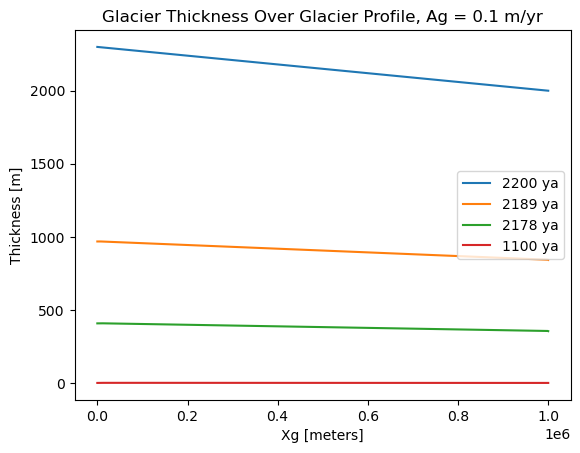

In [233]:
x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(tf,ti,nt)

plt.plot(x_domain, Hg_all[:,0])
plt.plot(x_domain, Hg_all[:,5])
plt.plot(x_domain, Hg_all[:,10])
plt.plot(x_domain, Hg_all[:,500])


plt.xlabel('Xg [meters]')
plt.ylabel('Thickness [m]')
plt.title('Glacier Thickness Over Glacier Profile, Ag = 0.1 m/yr')
plt.legend(['2200 ya','2189 ya','2178 ya','1100 ya'])

### Figure 2
##### Rate of Thickening Distance Along Glacier, Starting 2200 years ago to present with Ag = 10 m/yr

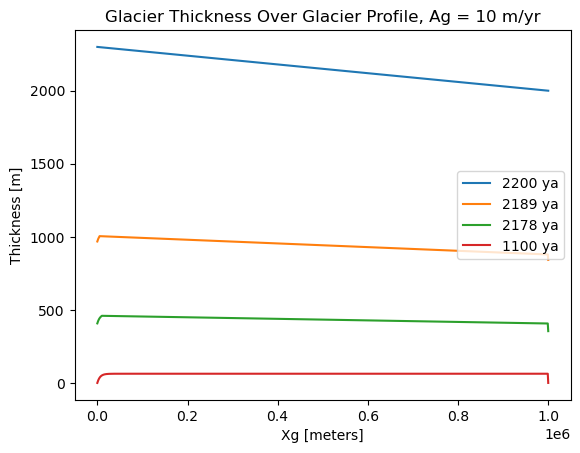

In [234]:
x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(tf,ti,nt)

plt.plot(x_domain, Hg_all2[:,0])
plt.plot(x_domain, Hg_all2[:,5])
plt.plot(x_domain, Hg_all2[:,10])
plt.plot(x_domain, Hg_all2[:,500])


plt.xlabel('Xg [meters]')
plt.ylabel('Thickness [m]')
plt.title('Glacier Thickness Over Glacier Profile, Ag = 10 m/yr')
plt.legend(['2200 ya','2189 ya','2178 ya','1100 ya'])

### Figure 3
##### Rate of Thickening Distance Along Glacier, Starting 2200 years ago to present with Ag = -10 m/yr

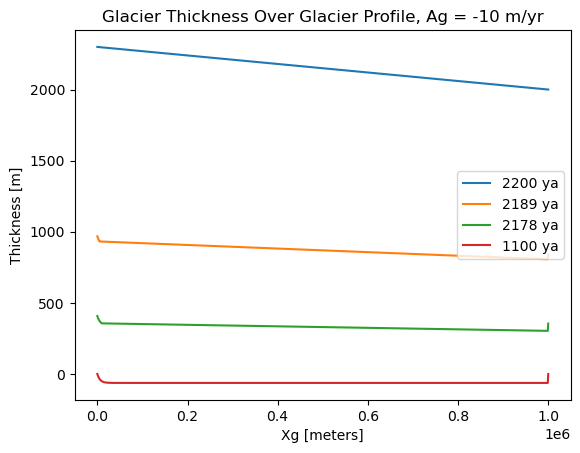

In [235]:
x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(tf,ti,nt)

plt.plot(x_domain, Hg_all3[:,0])
plt.plot(x_domain, Hg_all3[:,5])
plt.plot(x_domain, Hg_all3[:,10])
plt.plot(x_domain, Hg_all3[:,500])


plt.xlabel('Xg [meters]')
plt.ylabel('Thickness [m]')
plt.title('Glacier Thickness Over Glacier Profile, Ag = -10 m/yr')
plt.legend(['2200 ya','2189 ya','2178 ya','1100 ya'])

### Figure 4
##### Rate of Thickening Distance Along Glacier, Starting at present to 2200 years in fuutre with Ag = 0.1 m/yr

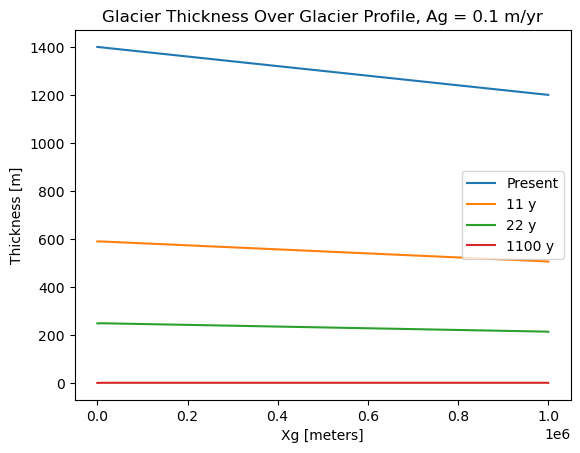

In [236]:
x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(ti2,tf2,nt)

plt.plot(x_domain, Hg_all4[:,0])
plt.plot(x_domain, Hg_all4[:,5])
plt.plot(x_domain, Hg_all4[:,10])
plt.plot(x_domain, Hg_all4[:,500])


plt.xlabel('Xg [meters]')
plt.ylabel('Thickness [m]')
plt.title('Glacier Thickness Over Glacier Profile, Ag = 0.1 m/yr')
plt.legend(['Present','11 y','22 y','1100 y'])

# References

Beget, J. (1987). Low Profile of the Northwest Laurentide Ice Sheet. Arctic and Alpine Research, 19(1), 81–88. https://doi.org/10.2307/1551003.

Davies, B. (2020, October 21). West Antarctic ice sheet. AntarcticGlaciers.org. https://www.antarcticglaciers.org/antarctica-2/west-antarctic-ice-sheet-2/west-antarctic-ice-sheet/

Davies, B. (2021, June 2). Antarctic Ice Sheet surface mass balance. AntarcticGlaciers.org. https://www.antarcticglaciers.org/glaciers-and-climate/changing-antarctica/antarctic-ice-sheet-surface-mass-balance/

Increased West Antarctic Ice Sheet melting ‘unavoidable’ - British Antarctic Survey. (2023, October 23). British Antarctic Survey. https://www.bas.ac.uk/media-post/increased-west-antarctic-ice-sheet-melting-unavoidable/

Lingle, C.S., & Clark, J.A. A numerical model of interactions between a marine ice sheet and the solid earth: Application to a West Antarctic ice stream. Journal of Geophysical Research: Oceans. Vol 90, Iss C1 (1985). https://doi.org/10.1029/JC090iC01p01100.

Paxman, G.J.G., Austermann, J. & Hollyday, A. Total isostatic response to the complete unloading of the Greenland and Antarctic Ice Sheets. Sci Rep 12, 11399 (2022). https://doi.org/10.1038/s41598-022-15440-y.

Whitehouse, P.L., Gomez, N., King, M.A. et al. Solid Earth change and the evolution of the Antarctic Ice Sheet. Nat Commun 10, 503 (2019). https://doi.org/10.1038/s41467-018-08068-y.

